In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv',
                   parse_dates=['Date'], index_col=['Date'])

In [3]:
print(data.shape)

data.head()

(365, 1)


,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


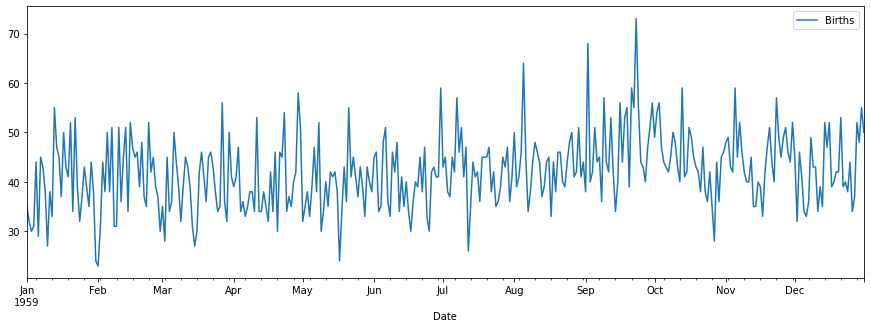

In [4]:
data.plot(figsize=(15,5));

### add some outlies to the serie

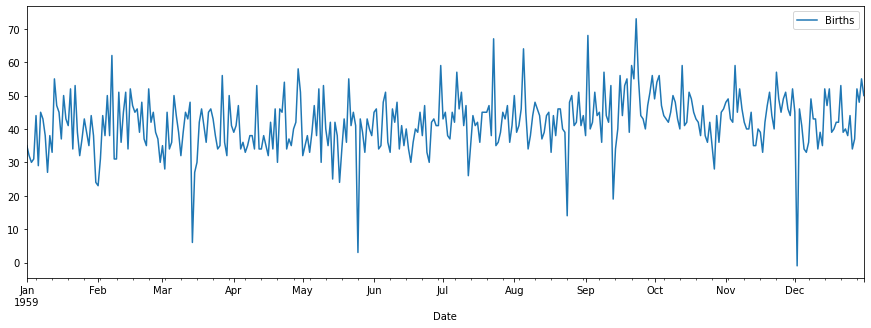

In [5]:
random_index = np.random.randint(0, len(data), 10)
random_values = np.random.randint(5, 40, 10) * np.sign(np.random.randn(10))

data.iloc[random_index] += random_values.reshape(-1,1)

data.plot(figsize=(15,5));

In [6]:
from outlierremover import MAOutlierRemover

In [7]:
def transform_and_plot(data, transformer):

    names = data.columns

    data_transformed = transformer.fit_transform(data)

    diff_df = pd.concat([
        data, 
        data_transformed.rename(dict(zip(names, [n+'_transformed' for n in names])), axis=1)
    ], axis=1)

    for n in names:
        diff_df[n+'_outlier'] = np.where(diff_df[n] != diff_df[n+'_transformed'], diff_df[n], np.nan)

        rolling_mean = diff_df[n].rolling(window=transformer.window).mean()
        mae = np.mean(np.abs(diff_df[n][transformer.window:] - rolling_mean[transformer.window:]))
        deviation = np.std(diff_df[n][transformer.window:] - rolling_mean[transformer.window:])
        lower_bound = rolling_mean - (mae + deviation * transformer.scale)
        upper_bound = rolling_mean + (mae + deviation * transformer.scale)

        plt.figure(figsize=(15,5))
        diff_df[n].plot(label='original '+n)
        rolling_mean.plot(style='-', color='red', label='moving average '+n)
        plt.fill_between(x=rolling_mean.index, y1=lower_bound, y2=upper_bound, color='tab:blue', alpha=0.2)
        diff_df[n+'_transformed'].plot(label='transformed '+n)
        diff_df[n+'_outlier'].plot(marker='o', color='red', label='outliers '+n)
        plt.legend()
        plt.show()

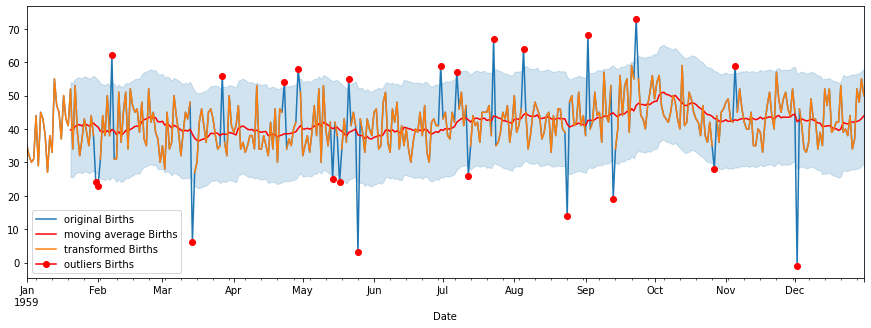

In [8]:
transformer1 = MAOutlierRemover(window=20, scale=1)

transform_and_plot(data, transformer1)

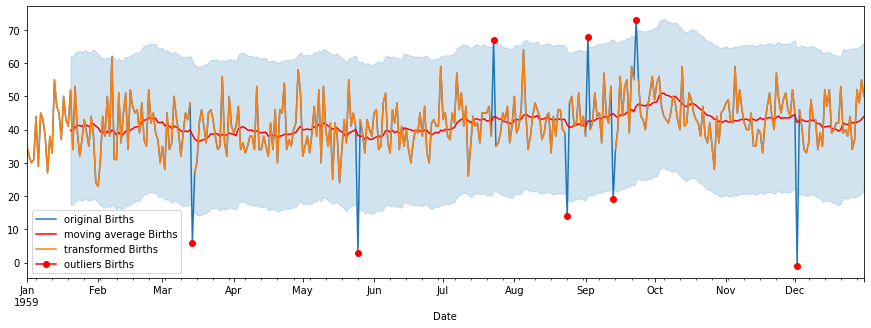

In [9]:
transformer2 = MAOutlierRemover(window=20, scale=2)

transform_and_plot(data, transformer2)

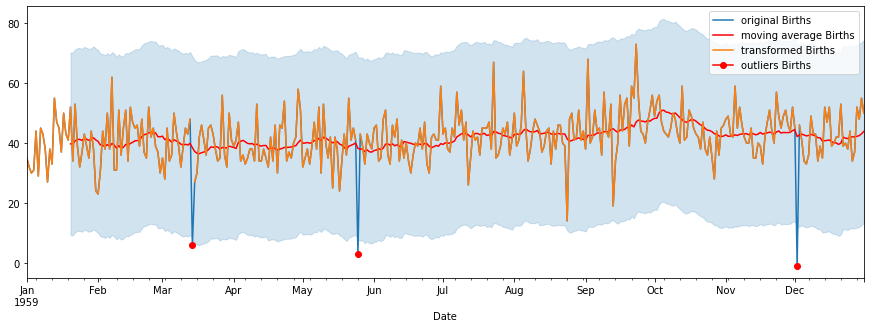

In [10]:
transformer3 = MAOutlierRemover(window=20, scale=3)

transform_and_plot(data, transformer3)